<a href="https://colab.research.google.com/github/pin94/house-price/blob/main/house-price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
myDirFiles='/content/drive/MyDrive/train.csv'
tr = pd.read_csv(myDirFiles,delimiter=',')
tr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
myDirFiles2='/content/drive/MyDrive/test.csv'
ts=pd.read_csv(myDirFiles2,delimiter=',')
ts

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Exploratory Data Analysis

In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Statistik Deskriptif Target Variabel

In [ ]:
tr.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Histogram Target Variable

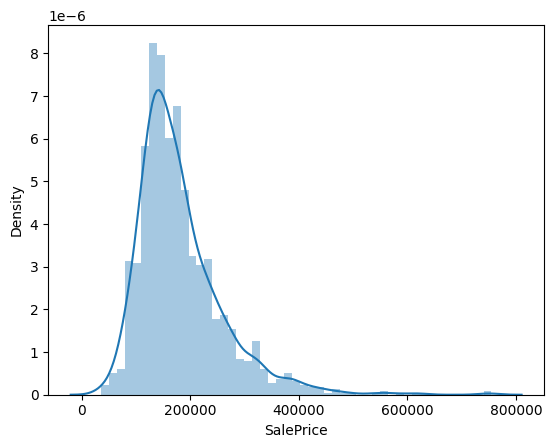

In [ ]:
sns.distplot(tr.SalePrice);

# Skewness dan Kurtosis Target Variable

In [ ]:
print('Skewness: %f' % tr.SalePrice.skew())
print('Kurtosis: %f' % tr.SalePrice.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


* Skewness untuk mengukur kesimetrisan distribusi (normal=0)
* Kurtosis untuk mengukur seberapa lancip/ landai distribusi (normal=3)

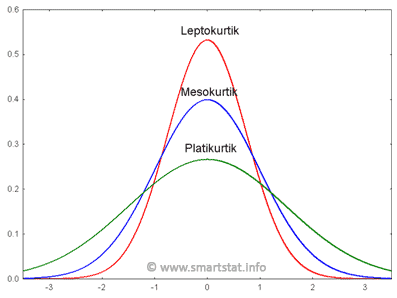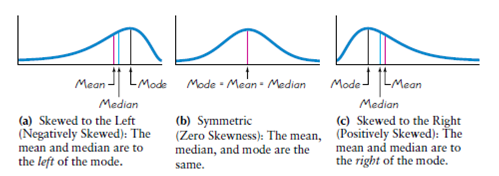

# Scatterplot GrLivArea terhdapat target variabel

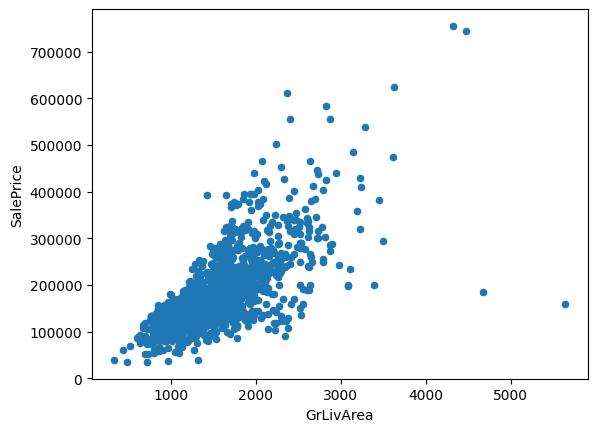

In [ ]:
data=pd.concat([tr.SalePrice,tr.GrLivArea],axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice');

# Scatterplot TotalBsmtSF terhadap target variabel

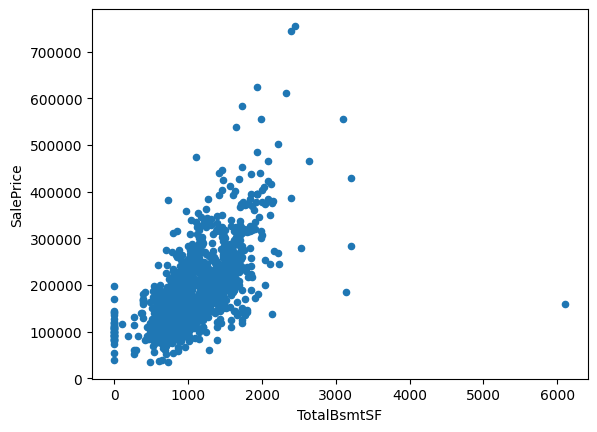

In [ ]:
data=pd.concat([tr.SalePrice,tr.TotalBsmtSF],axis=1)
data.plot.scatter(x='TotalBsmtSF',y='SalePrice');

# Boxplot OverallQual terhadap target variabel



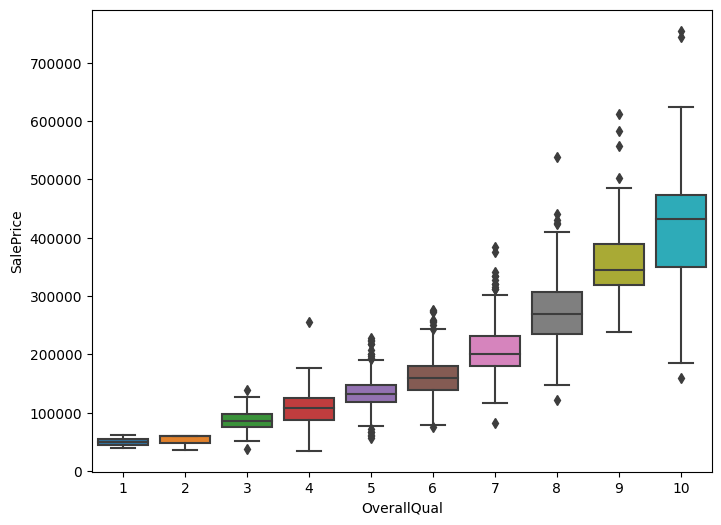

In [ ]:
data=pd.concat([tr.SalePrice,tr.OverallQual],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='OverallQual',y='SalePrice',data=data);

In [ ]:
tr[(tr.OverallQual==10)&(tr.SalePrice<200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


# Boxplot YearBuilt terhadap target variable

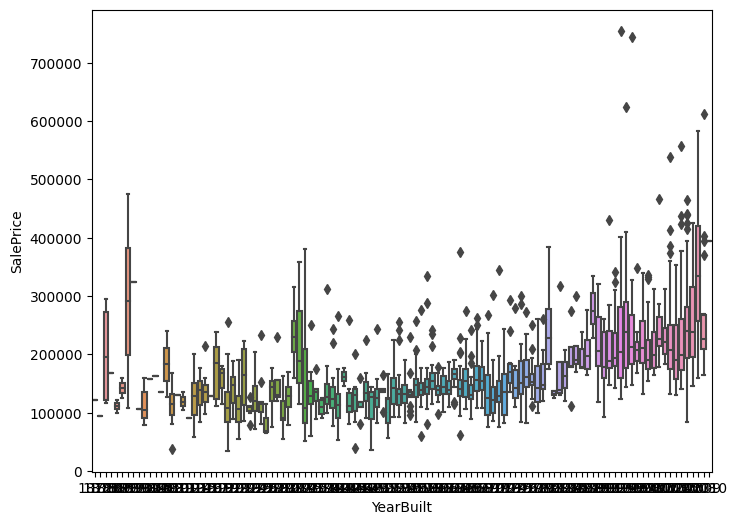

In [ ]:
data=pd.concat([tr.SalePrice,tr.YearBuilt],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='YearBuilt',y='SalePrice',data=data);

# Correlation Map antar variabel

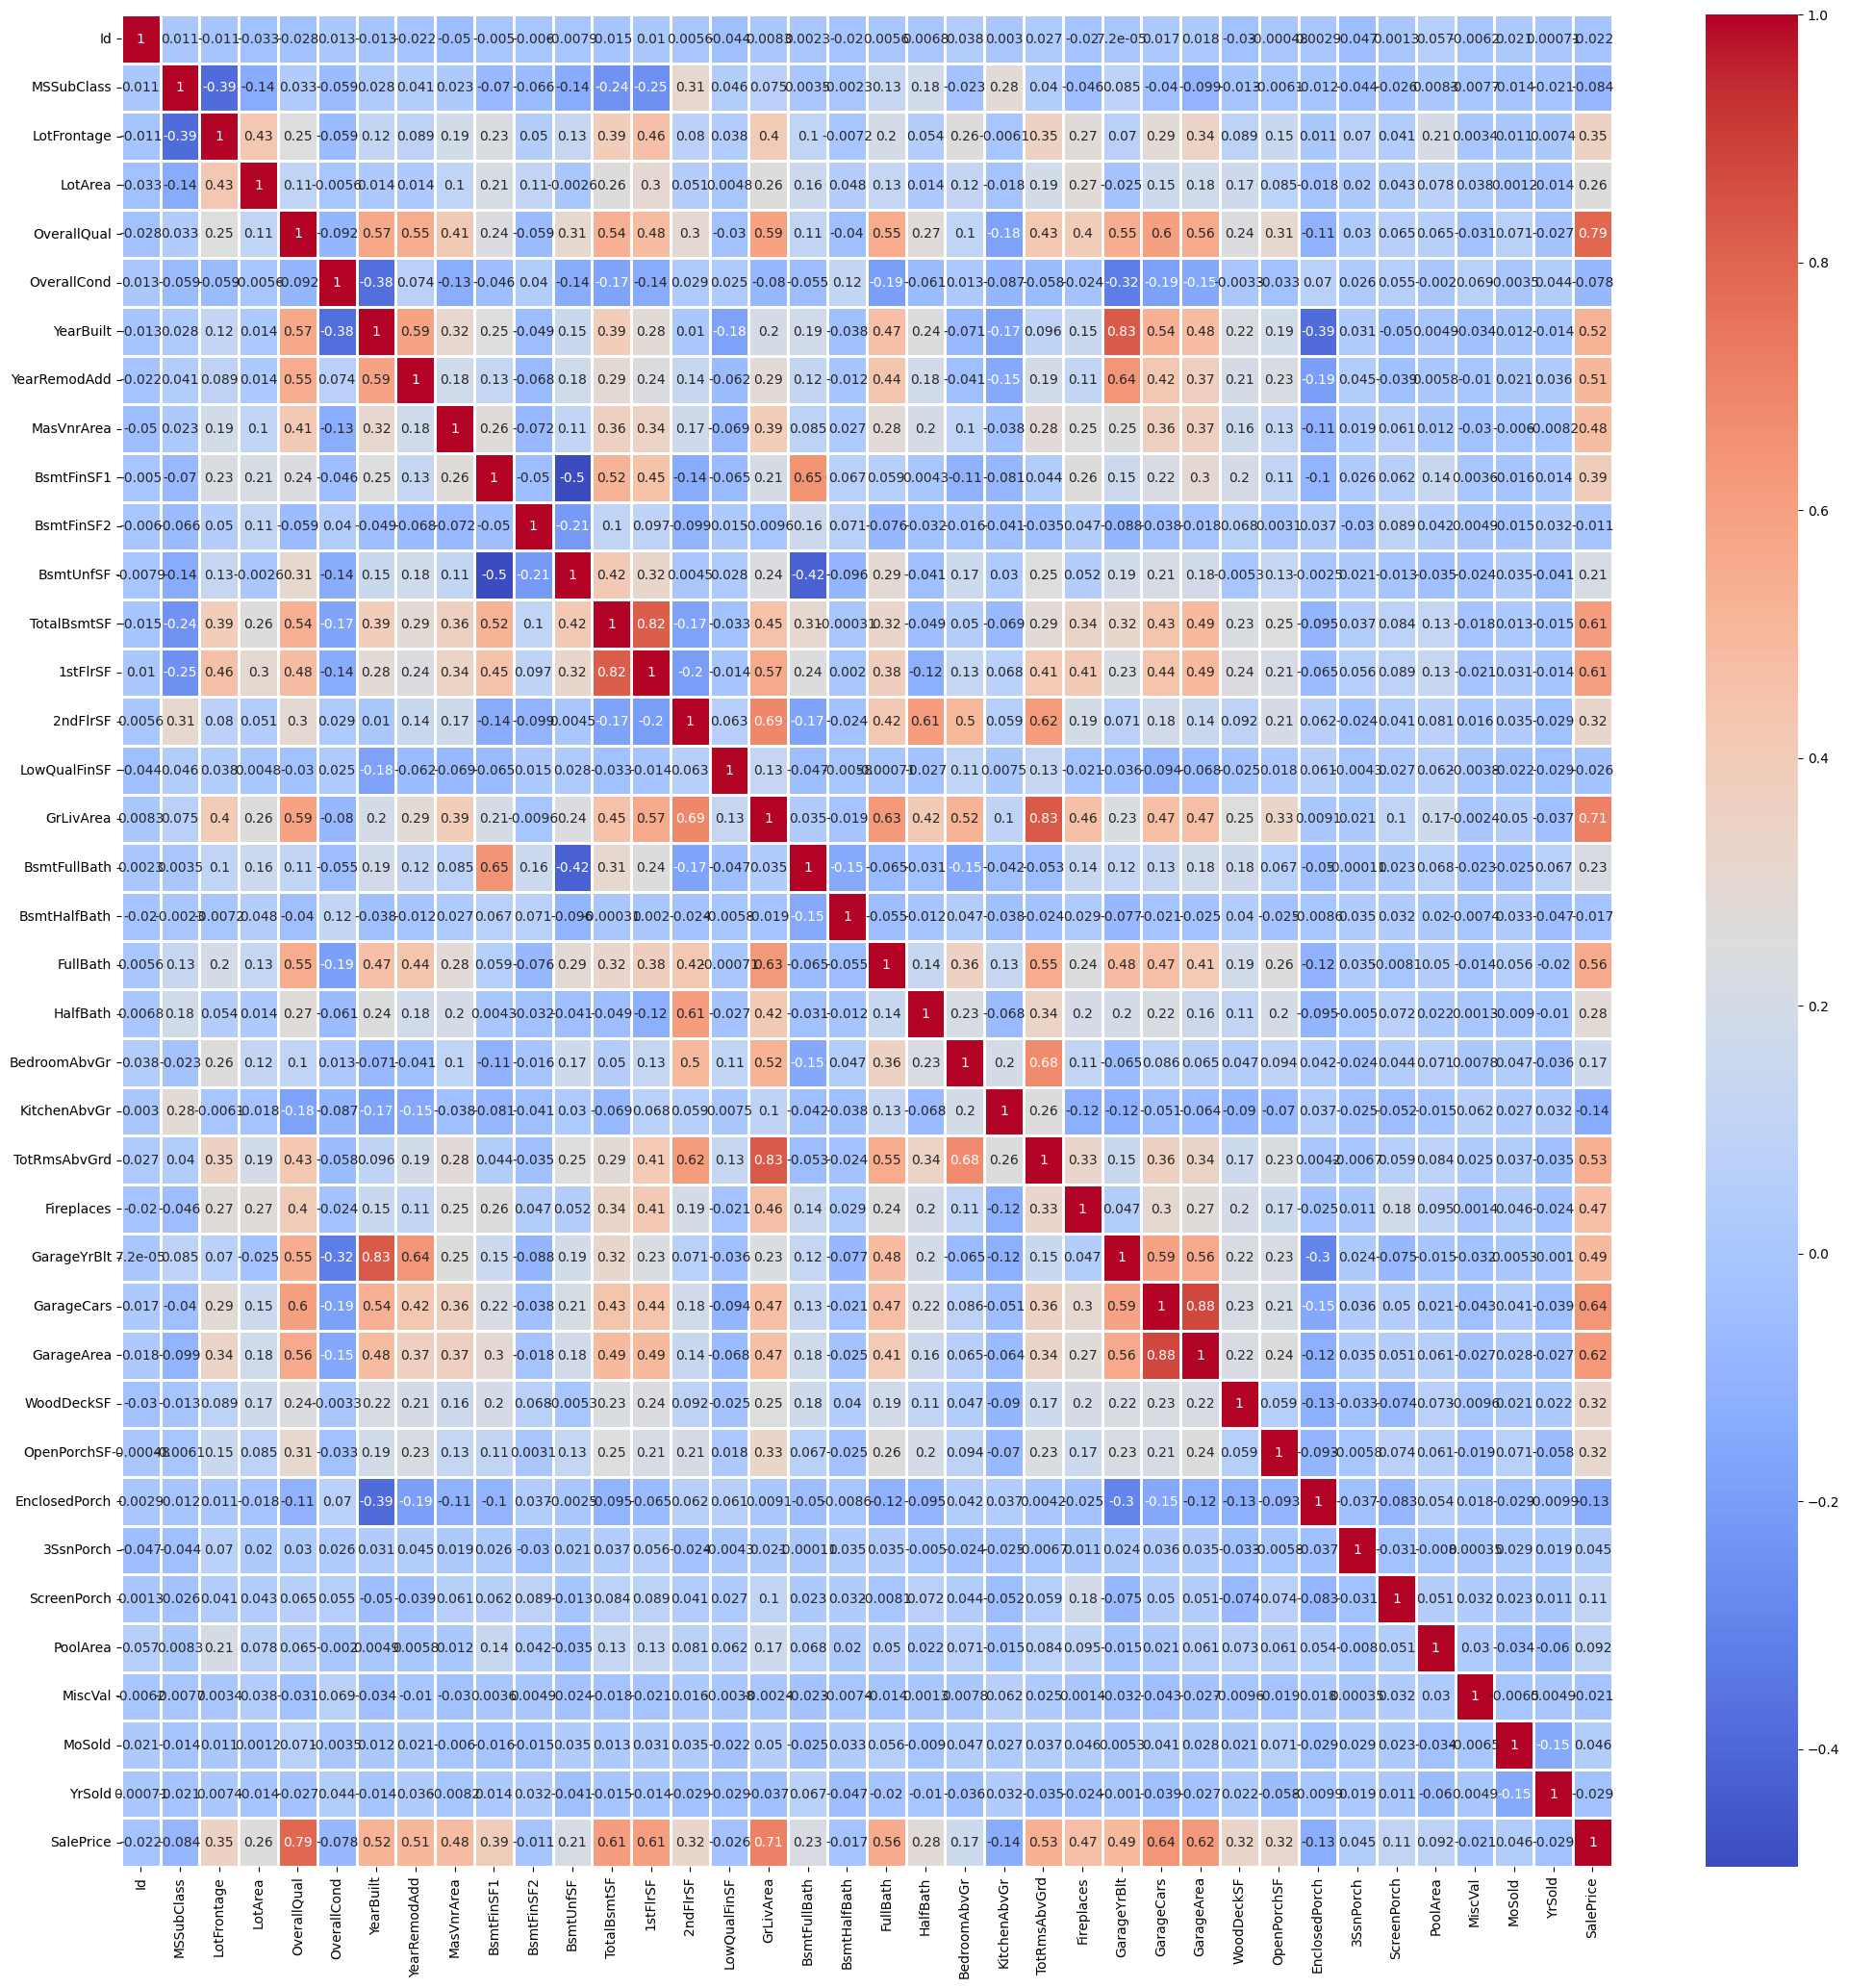

In [ ]:
plt.figure(figsize=(25,25))
ax=sns.heatmap(tr.corr(),cmap='coolwarm',annot=True,linewidth=2);

Multikolinearitas adalah sebuah situasi yang menunjukkan adanya korelasi atau hubungan kuat antara dua variabel bebas atau lebih dalam sebuah model regresi berganda.

contoh dalam heat map di atas adala TotalBsmtSF dan 1stFlrSF merupakan multikolineritas dalam SalePrice.

In [ ]:
tr.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


# Correlation Map yang korelasi terhadap target variabel >= 0.5

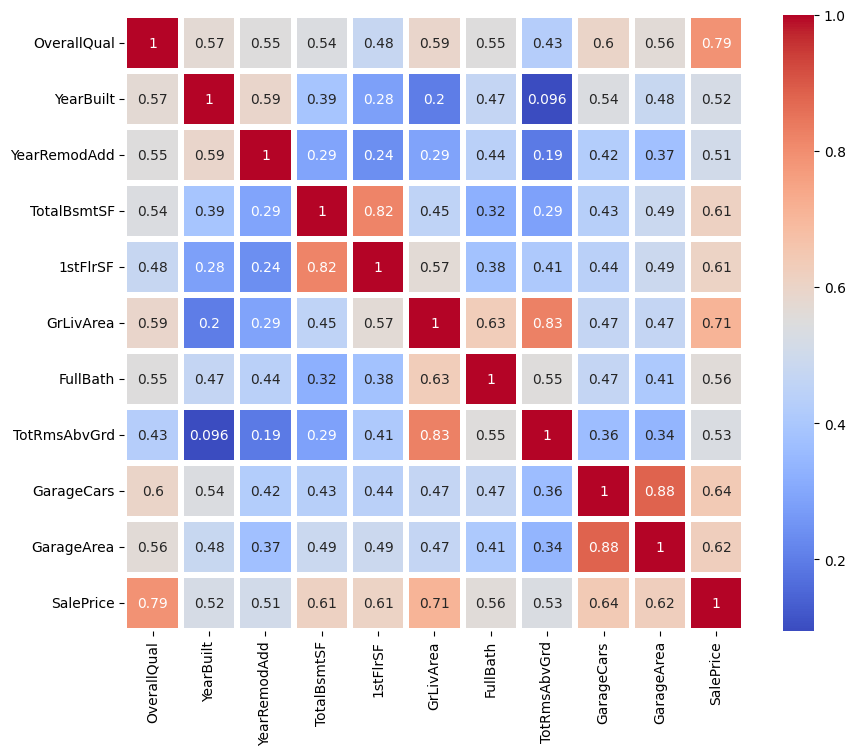

In [ ]:
hig_corr=tr.corr()
hig_corr_features=hig_corr.index[abs(hig_corr.SalePrice)>=0.5]

plt.figure(figsize=(10,8))
ax=sns.heatmap(tr[hig_corr_features].corr(),cmap='coolwarm',
               annot=True,linewidth=3);

# Pairplot beberapa variabel dengan korelasi > 0,5 terhadap target variabel

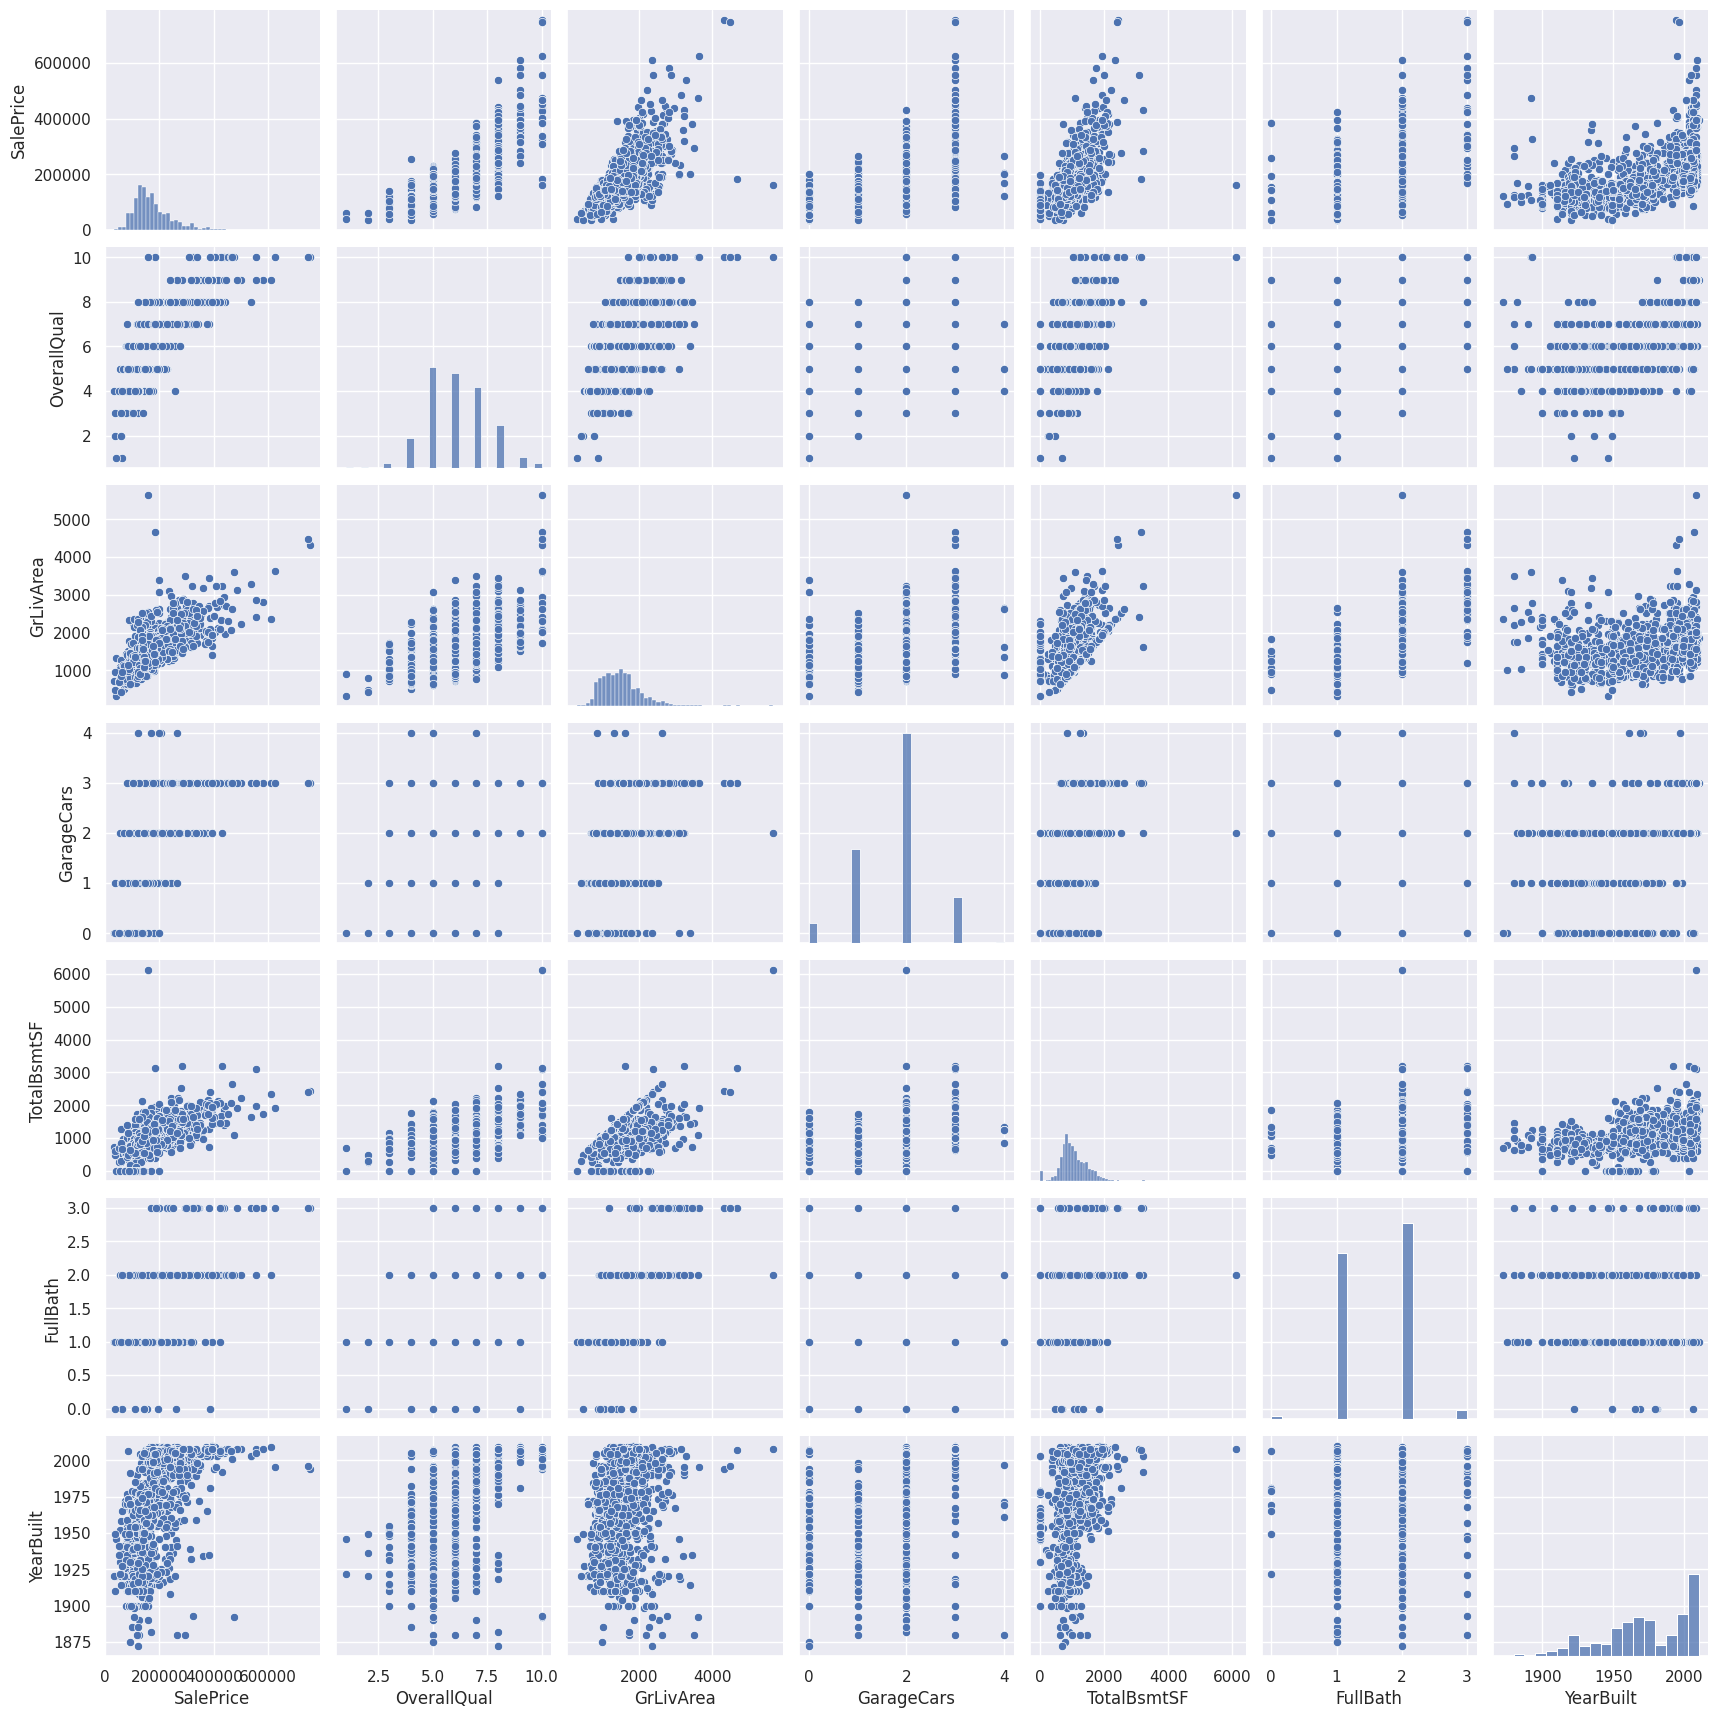

In [ ]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF',
      'FullBath','YearBuilt']
sns.pairplot(tr[cols],size=2.5);

# Cek rataan dan simpangan baku distribusi target variabel
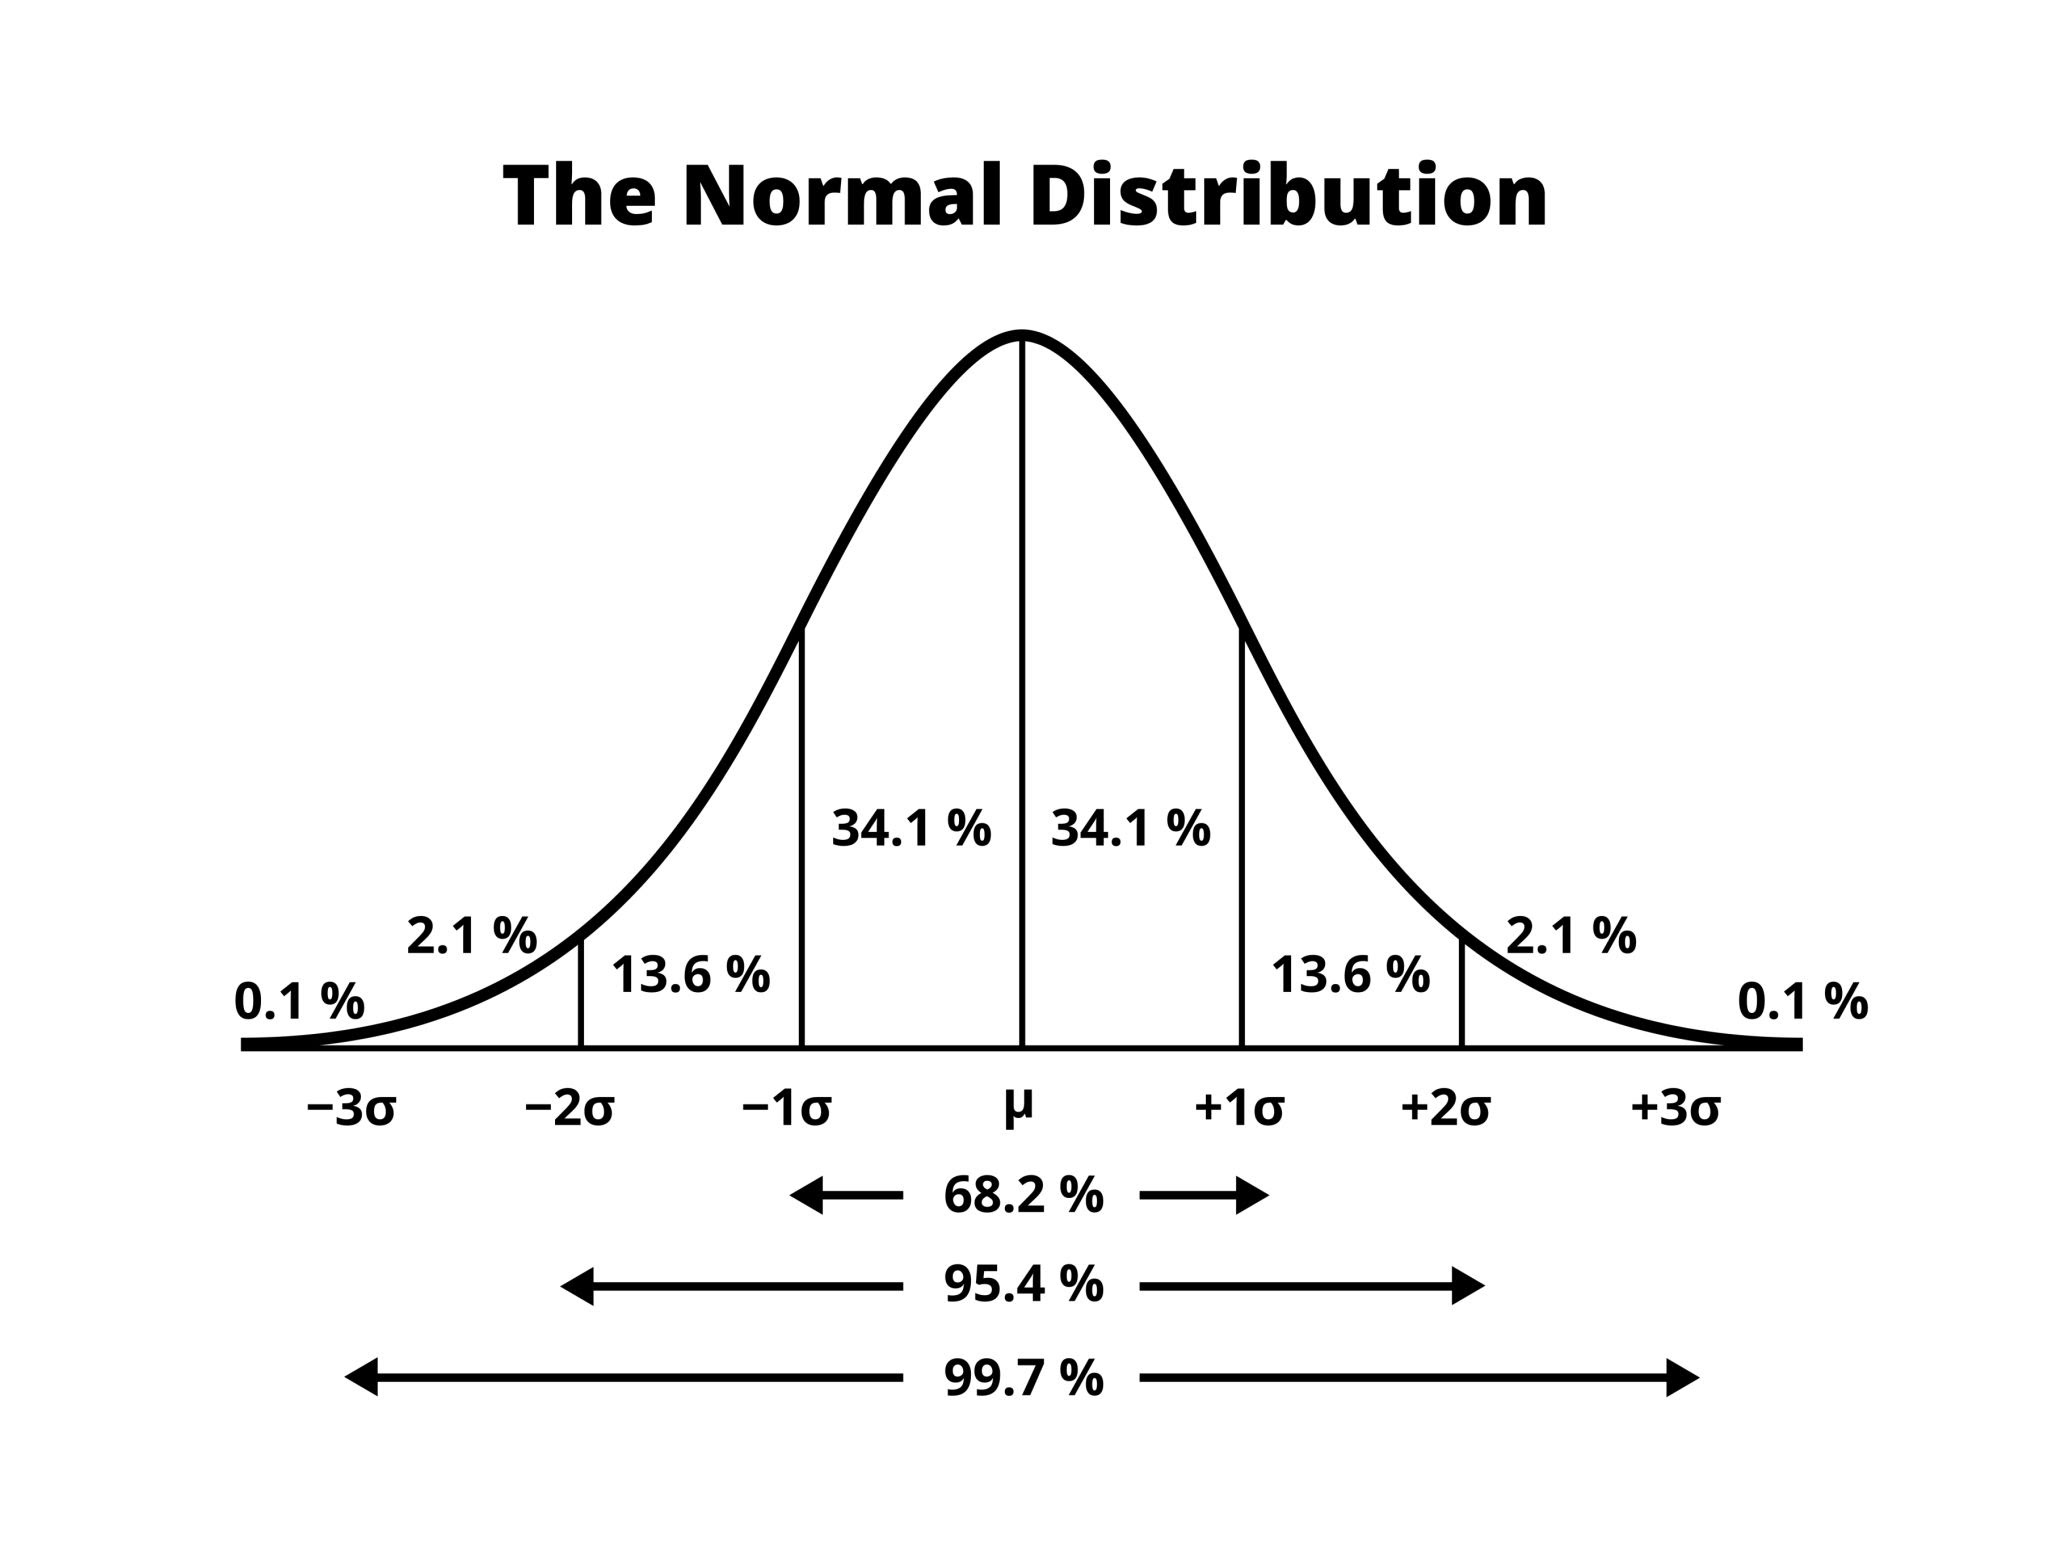


 mu = 180921.20 and sigma = 79415.29



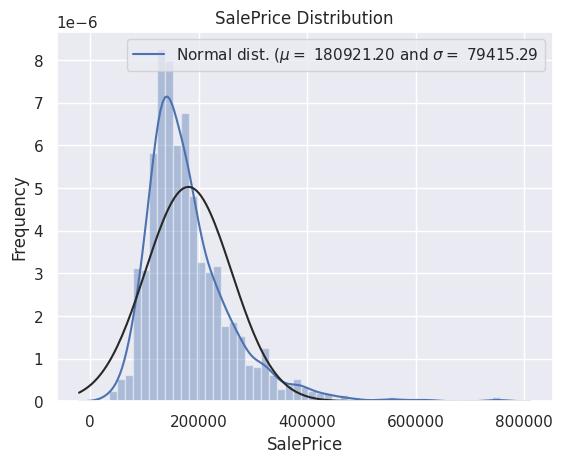

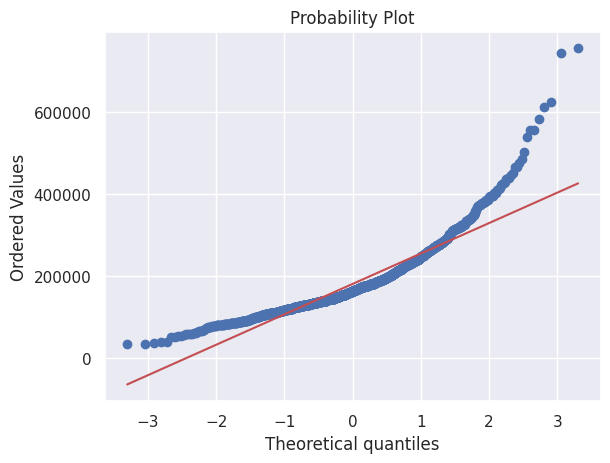

In [ ]:
sns.distplot(tr.SalePrice,fit=norm);

# print mu dan sigma
(mu,sigma)=norm.fit(tr.SalePrice)
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

# plot distribusi
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu,sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# QQ-plot
fig=plt.figure()
res=stats.probplot(tr.SalePrice, plot=plt);


# Transformasi Log pada target variabel


 mu = 12.02 and sigma = 0.40



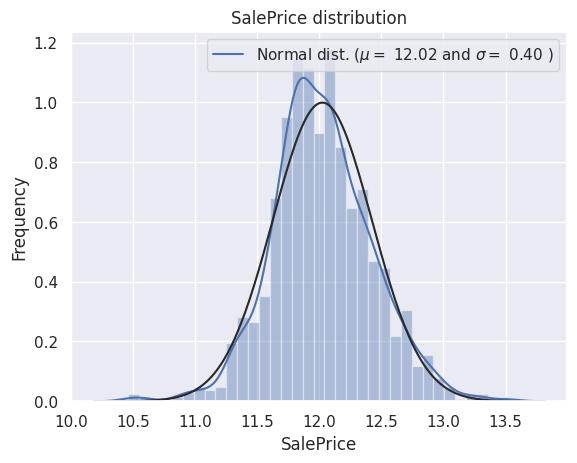

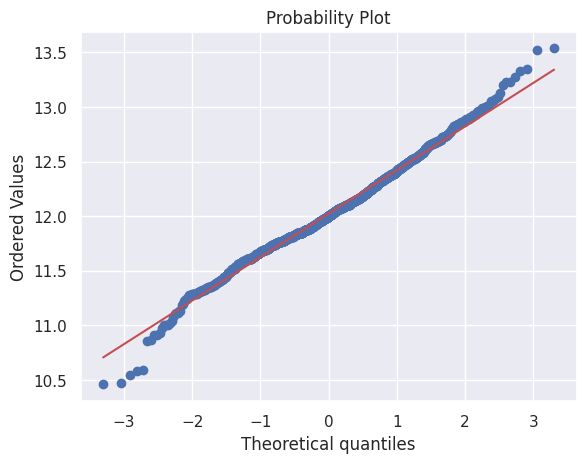

In [ ]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
tr["SalePrice"] = np.log1p(tr["SalePrice"])

# Check the new distribution 
sns.distplot(tr['SalePrice'] , fit=norm);

# Print Mu dan Sigma
(mu, sigma) = norm.fit(tr['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot Distribusi
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ Plot
fig = plt.figure()
res = stats.probplot(tr['SalePrice'], plot=plt)
plt.show()

# Menggabungkan Train dan Test data



In [ ]:
ntrain=tr.shape[0]
ntest=ts.shape[0]
y_train=tr.SalePrice.values
all_data=pd.concat((tr,ts)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


# Menghitung Missing Value

In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


# Missing Value Treatment

## NA=tidak ada (kategorik)

In [ ]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
            'GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual',
            'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType',
            'MSSubClass'):
  all_data[col]=all_data[col].fillna('None')

## NA= tidak ada (numerik)

In [ ]:
for col in ('GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
            'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','MasVnrArea'):
  all_data[col]=all_data[col].fillna(0)

## NA=no info dari deskripsi, fill modus (kategorik)

In [ ]:
for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd',
            'SaleType'):
  all_data[col]=all_data[col].fillna(all_data[col].mode()[0])

## NA=no info dari deskripsi, fill modus (numerik)

In [ ]:
# Group by neighbourhood and fill in missing value by the median LotFromtage of all the neighbourhood
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

## NA = Typ (Typical)

In [ ]:
all_data.Functional=all_data.Functional.fillna('Typ')

# Drop column karena hampir semua data AllPub

In [ ]:
all_data.groupby('Utilities').size()

Utilities
AllPub    2916
NoSeWa       1
dtype: int64

In [ ]:
all_data=all_data.drop(['Utilities'],axis=1)

# Cek sisa missing value

In [ ]:
# Check remaining missing values if any
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data=pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head()

,Missing Ratio


# Ubah tipe data numerik menjadi kategorik

In [ ]:
# MSSubClass=the building class
all_data['MSSubClass']=all_data['MSSubClass'].apply(str)

# Changing the OverallCond into a categorical variable
all_data['OverallCond']=all_data['OverallCond'].astype(str)

# Year and month sold are transformed inti categorical features
all_data['YrSold']=all_data['YrSold'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)

# Feature Engineering

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=('FireplaceQu','BsmtQual','BsmtCond','GarageQual','GarageCond','ExterQual',
      'ExterCond','HeatingQC','PoolQC','KitchenQual','BsmtFinType1',
      'BsmtFinType2','Functional','Fence','BsmtExposure','GarageFinish','LandSlope',
      'LotShape','PavedDrive','Street','Alley','CentralAir','MSSubClass','OverallCond',
      'YrSold','MoSold')

# press columns, apply LabelEncoder to categorical features
for c in cols:
  lbl=LabelEncoder()
  lbl.fit(list(all_data[c].values))
  all_data[c]=lbl.transform(list(all_data[c].values))

# shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 79)


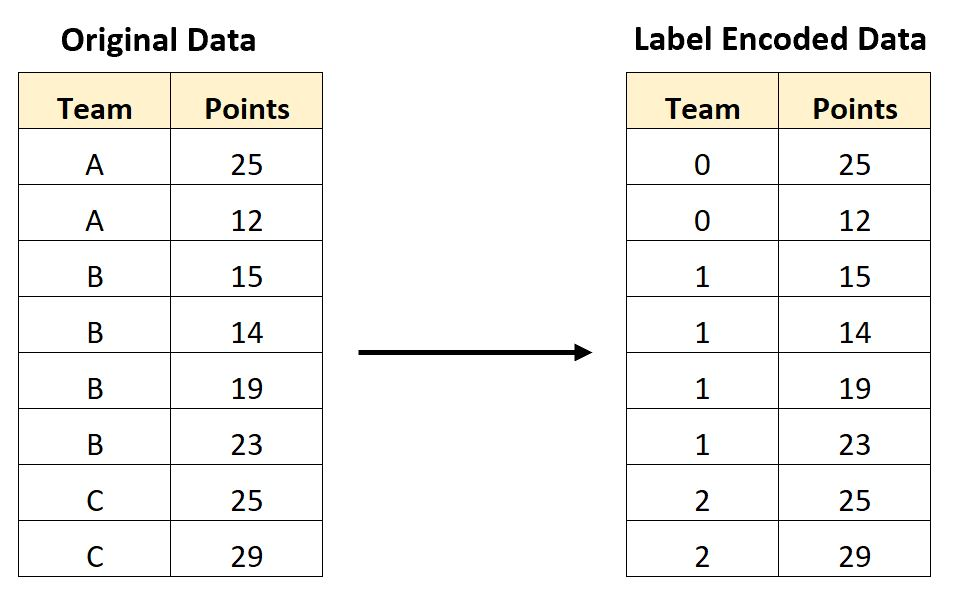

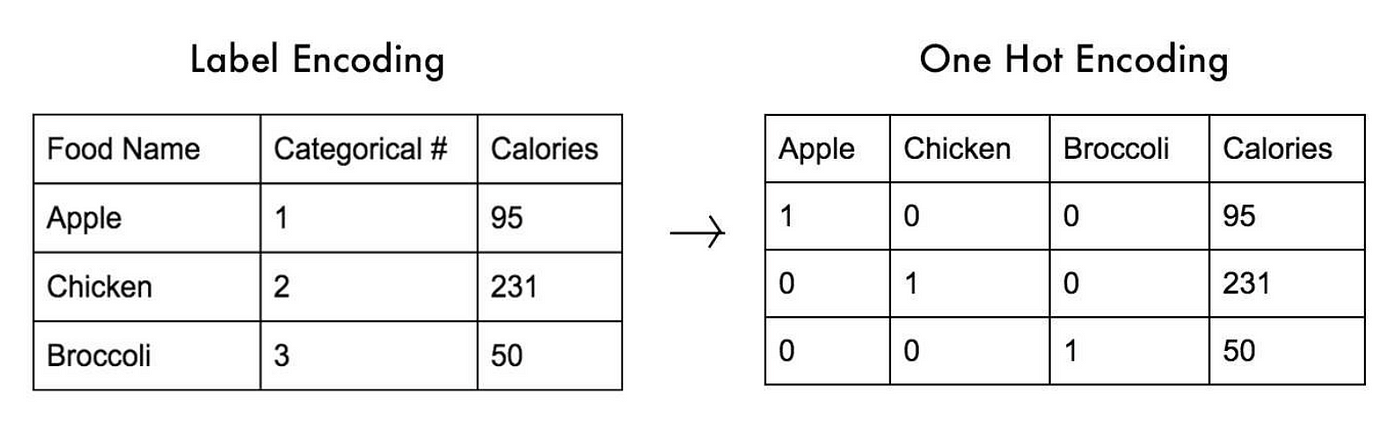

## Membuat Variabel Baru TotalSF

In [ ]:
# adding total sqfootage feature
all_data['TotalSF']= all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']


## Cek top 10 skewness

In [ ]:
from scipy.stats import norm, skew

numeric_feats=all_data.dtypes[all_data.dtypes != "object"].index

# check the skew of all numerical features
skewed_feats=all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('n\Skew in numerical features: \n')
skewness=pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

n\Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


## Ubah skewness yang lebih dari 0,75 dengan boxcox

In [ ]:
skewness=skewness[abs(skewness)>0.75]
print('There are {} skewed nunerical features to Box Cox transform'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features=skewness.index
lam=0.15
for feat in skewed_features:
  all_data[feat]=boxcox1p(all_data[feat],lam)

There are 60 skewed nunerical features to Box Cox transform


## Cek kembali skewness

In [ ]:
# cek the skew of all numerical features
skewed_feats=all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features: \n')
skewness=pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
PoolArea,15.119426
3SsnPorch,8.924822
LowQualFinSF,8.744143
MiscVal,5.597060
LandSlope,4.532036
BsmtHalfBath,3.788243
KitchenAbvGr,3.698825
ScreenPorch,2.978396
BsmtFinSF2,2.564481
EnclosedPorch,2.025461


## Dummy Variable

In [ ]:
all_data=pd.get_dummies(all_data,drop_first=True)
print(all_data.shape)

(2919, 202)


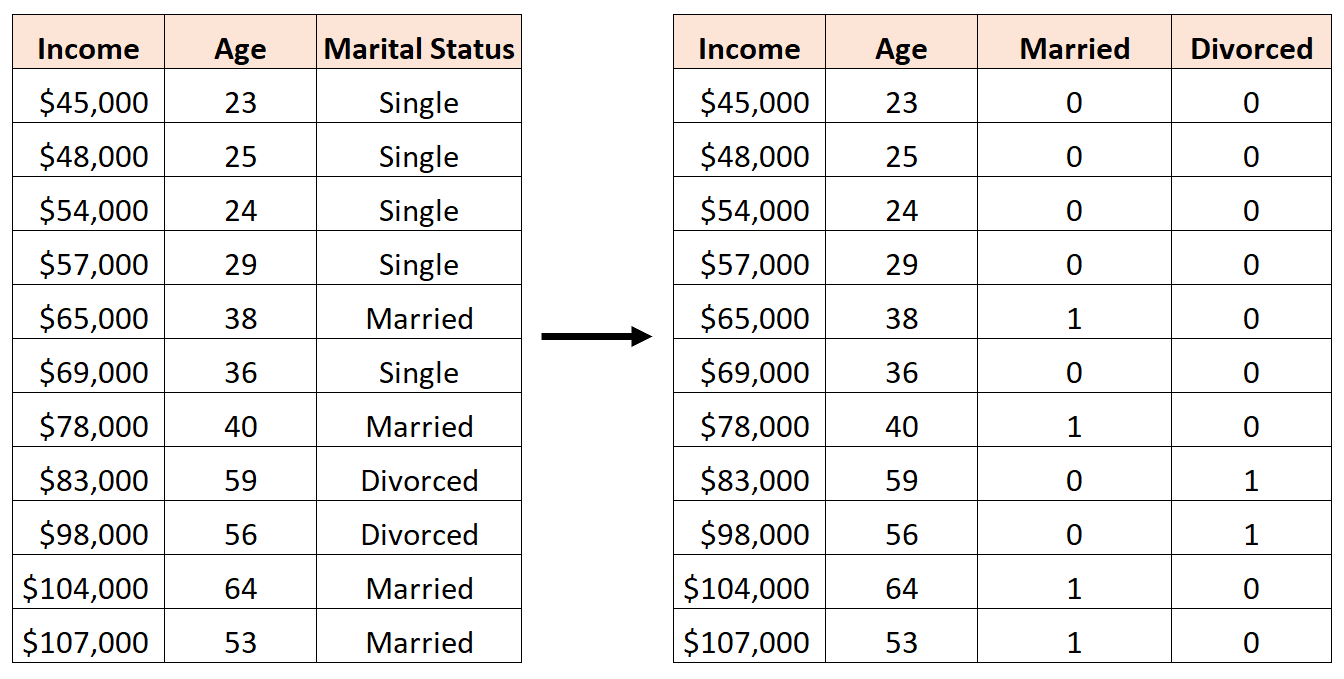

## Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(all_data)
all_data=scaler.transform(all_data)

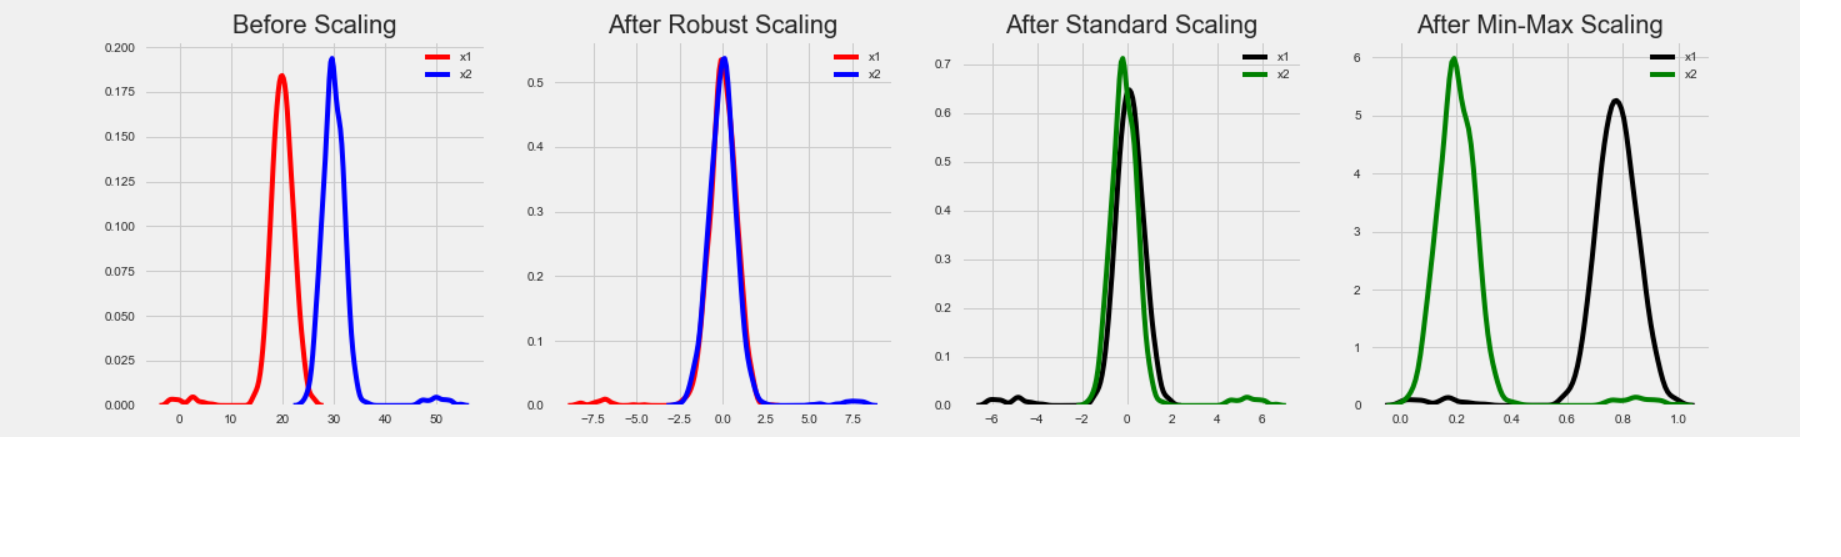

## Pisahkan kembali train dan test data

In [ ]:
x_train=all_data[:ntrain]
x_test=all_data[ntrain:]

x_train.shape, x_test.shape, y_train.shape

((1460, 202), (1459, 202), (1460,))

In [ ]:
x_train

array([[-3.89625739e+00,  1.00000000e+00, -2.56476436e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.75157603e+00,  0.00000000e+00,  4.69964168e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.64345358e+00,  1.00000000e+00, -1.00689145e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.27456188e-03,  1.15115999e+00, -2.03890357e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.37095430e-04,  0.00000000e+00, -1.00689145e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.41557359e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

# Modeling

## Fungsi KFold dan evaluation score

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model,x_train=x_train,y_train=y_train):
  cv=KFold(n_splits=4,shuffle=True,random_state=45)
  r2=make_scorer(r2_score)

  r2_val_score=cross_val_score(model,x_train,y_train,cv=cv,scoring=r2)
  score=[r2_val_score.mean()]
  return score

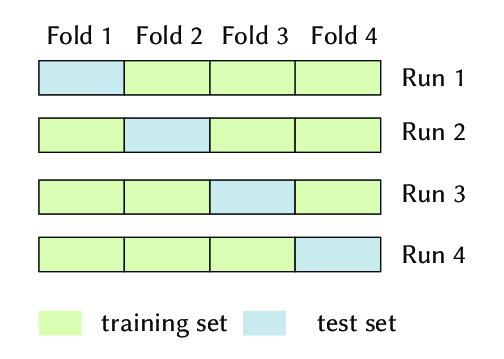

## Linear Regression

In [ ]:
import sklearn.linear_model as linear_model
LR=linear_model.LinearRegression()
test_model(LR)

[0.8579185981287434]

## Ridge

In [ ]:
rdg=linear_model.Ridge()
test_model(rdg)

[0.8785916554386168]

## Lasso

In [ ]:
lasso=linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.878536580137704]

## SVR

In [ ]:
from sklearn.svm import SVR
svr_reg=SVR(kernel='rbf')
test_model(svr_reg)

[0.8592616234735418]

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[0.7248575100216825]

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=1000,random_state=51)
test_model(rf_reg)

[0.8600537309097532]

## Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg=BaggingRegressor(n_estimators=1000,random_state=51)
test_model(br_reg)

[0.8601686763834528]

## Gradient Boosting Regressor

In [ ]:
gbr_reg=GradientBoostingRegressor(n_estimators=1000, 
                                    learning_rate=0.1,
                                    loss='squared_error',
                                    random_state=51)
test_model(gbr_reg)

[0.8733008411258776]

## XGBoost

In [ ]:
import xgboost

xgb_reg=xgboost.XGBRegressor()
test_model(xgb_reg)

[0.850868119420739]

* RMSE, MAE, MSE akurasi semakin bagus jika skornya 0
* linear regression, ridge, lasso, SVR, decision tree regressor, random forrest regressor, bagging regressor, gradient boosting regressor, xgboost akurasi semakin bagus jika skornya mendekati 1